In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
!pwd

/root/capsule/code


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/root/capsule/data/challenge2_files/fulvestrantTrain.tsv",sep='\t')
df.head()

,Fulvestrant_response,type,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,...,rna_MAFIP,rna_CD24,rna_HLA-DRB3,rna_LOC389831,rna_MGC70870,rna_LOC100233156,rna_LOC389834,rna_LOC283788,rna_RNA5-8S5,rna_LOC102723780
Breast_SQ68,1,Breast,0,0,0,0,0,0,1,0,...,1.765641,3.610263,0.000000,0.144895,0.109381,0.000000,0.377070,0.743830,7.430427,0.379076
Breast_EI813,0,Breast,0,0,0,0,0,0,0,0,...,0.683720,1.901263,0.000000,1.973497,0.560144,0.763473,0.508316,1.166169,9.509599,1.445901
Breast_PV9,1,Breast,0,0,0,0,1,0,1,0,...,2.985080,4.125750,0.160901,1.316661,0.265797,1.167377,1.316250,1.320358,7.672418,0.230426
Breast_KY76,0,Breast,0,0,0,0,0,0,0,0,...,0.442882,0.320471,0.077141,3.301013,0.063881,0.323250,0.515944,0.272920,4.727648,0.222489
Breast_EPQV2,1,Breast,0,0,0,1,0,1,0,0,...,3.361561,7.317910,0.071225,2.624524,0.108735,1.402040,1.296005,1.550906,10.491553,2.474496


<Axes: >

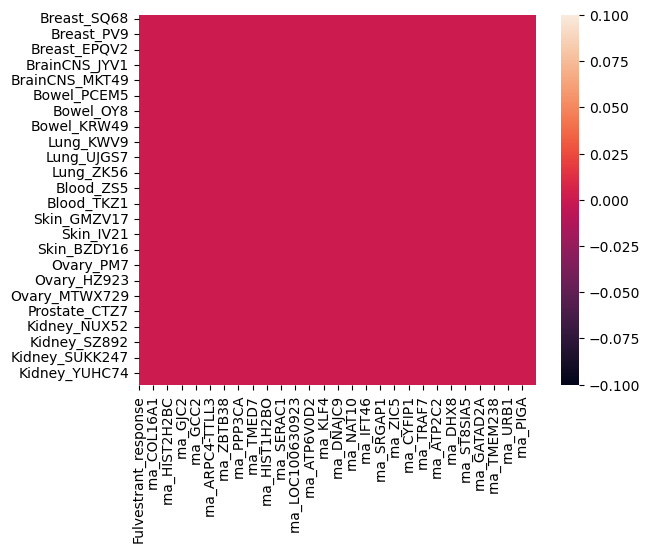

In [5]:
import seaborn as sns
sns.heatmap(df.isnull())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, Breast_SQ68 to Kidney_JN167
Columns: 15990 entries, Fulvestrant_response to rna_LOC102723780
dtypes: float64(15747), int64(242), object(1)
memory usage: 5.9+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fulvestrant_response,48.0,0.166667,0.376622,0.000000,0.000000,0.000000,0.000000,1.000000
mut_C1orf222,48.0,0.166667,0.376622,0.000000,0.000000,0.000000,0.000000,1.000000
mut_CAMTA1,48.0,0.104167,0.308709,0.000000,0.000000,0.000000,0.000000,1.000000
mut_H6PD,48.0,0.104167,0.308709,0.000000,0.000000,0.000000,0.000000,1.000000
mut_SPEN,48.0,0.166667,0.376622,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
rna_LOC100233156,48.0,0.987229,0.702078,0.000000,0.443859,0.923775,1.414979,2.339186
rna_LOC389834,48.0,0.622126,0.430358,0.000000,0.289601,0.543560,0.839956,1.788611
rna_LOC283788,48.0,1.054658,0.463828,0.166925,0.702650,1.038418,1.376191,2.375384
rna_RNA5-8S5,48.0,10.509791,2.273620,3.829951,9.159831,11.387891,12.097373,13.777173


In [8]:
column_names = df.columns
column_names

Index(['Fulvestrant_response', 'type', 'mut_C1orf222', 'mut_CAMTA1',
       'mut_H6PD', 'mut_SPEN', 'mut_HSPG2', 'mut_ARID1A', 'mut_ZSCAN20',
       'mut_CSMD2',
       ...
       'rna_MAFIP', 'rna_CD24', 'rna_HLA-DRB3', 'rna_LOC389831',
       'rna_MGC70870', 'rna_LOC100233156', 'rna_LOC389834', 'rna_LOC283788',
       'rna_RNA5-8S5', 'rna_LOC102723780'],
      dtype='object', length=15990)

In [9]:
mut_columns = [col for col in column_names if col.startswith('mut')]
len(mut_columns)
mut_columns[0:5]

['mut_C1orf222', 'mut_CAMTA1', 'mut_H6PD', 'mut_SPEN', 'mut_HSPG2']

In [10]:
for col in mut_columns:
    unique_values = df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in mut_C1orf222: [0 1]
Unique values in mut_CAMTA1: [0 1]
Unique values in mut_H6PD: [0 1]
Unique values in mut_SPEN: [0 1]
Unique values in mut_HSPG2: [0 1]
Unique values in mut_ARID1A: [0 1]
Unique values in mut_ZSCAN20: [1 0]
Unique values in mut_CSMD2: [0 1]
Unique values in mut_MACF1: [0 1]
Unique values in mut_CDCP2: [0 1]
Unique values in mut_LRRC7: [1 0]
Unique values in mut_ADGRL2: [0 1]
Unique values in mut_COL11A1: [0 1]
Unique values in mut_CHI3L2: [1 0]
Unique values in mut_OVGP1: [0 1]
Unique values in mut_NOTCH2: [0 1]
Unique values in mut_PDE4DIP: [0 1]
Unique values in mut_OTUD7B: [0 1]
Unique values in mut_RHBG: [0 1]
Unique values in mut_SPTA1: [0 1]
Unique values in mut_BRINP3: [0 1]
Unique values in mut_ASPM: [0 1]
Unique values in mut_CRB1: [0 1]
Unique values in mut_CACNA1S: [0 1]
Unique values in mut_USH2A: [0 1]
Unique values in mut_ITPKB: [0 1]
Unique values in mut_APOB: [0 1]
Unique values in mut_LTBP1: [0 1]
Unique values in mut_PRKD3: [0 1]
Un

In [11]:
df[mut_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mut_C1orf222,48.0,0.166667,0.376622,0.0,0.0,0.0,0.0,1.0
mut_CAMTA1,48.0,0.104167,0.308709,0.0,0.0,0.0,0.0,1.0
mut_H6PD,48.0,0.104167,0.308709,0.0,0.0,0.0,0.0,1.0
mut_SPEN,48.0,0.166667,0.376622,0.0,0.0,0.0,0.0,1.0
mut_HSPG2,48.0,0.145833,0.356674,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
mut_DMD,48.0,0.187500,0.394443,0.0,0.0,0.0,0.0,1.0
mut_KIAA2022,48.0,0.104167,0.308709,0.0,0.0,0.0,0.0,1.0
mut_ADGRG4,48.0,0.125000,0.334219,0.0,0.0,0.0,0.0,1.0
mut_MAGEC1,48.0,0.145833,0.356674,0.0,0.0,0.0,0.0,1.0


In [12]:
rna_columns = [col for col in column_names if col.startswith('rna')]
len(rna_columns)

15774

In [13]:
df[rna_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
rna_LOC729737,48.0,0.849170,0.540335,0.131164,0.462524,0.675559,1.139656,2.264867
rna_LOC100132062,48.0,0.398930,0.400881,0.000000,0.065269,0.292799,0.728816,1.301950
rna_WASH7P,48.0,2.538287,0.638040,0.565670,2.112973,2.542027,3.021919,4.148837
rna_OR4F16,48.0,0.206925,0.424661,0.000000,0.000000,0.000000,0.216189,1.965899
rna_LOC100133331,48.0,1.227234,0.741723,0.265082,0.753128,1.108340,1.501463,4.719518
...,...,...,...,...,...,...,...,...
rna_LOC100233156,48.0,0.987229,0.702078,0.000000,0.443859,0.923775,1.414979,2.339186
rna_LOC389834,48.0,0.622126,0.430358,0.000000,0.289601,0.543560,0.839956,1.788611
rna_LOC283788,48.0,1.054658,0.463828,0.166925,0.702650,1.038418,1.376191,2.375384
rna_RNA5-8S5,48.0,10.509791,2.273620,3.829951,9.159831,11.387891,12.097373,13.777173


In [14]:
(df[rna_columns].describe().loc['min'] < 0).any()

False

In [15]:
list(set(column_names)-set(mut_columns)-set(rna_columns))

['Fulvestrant_response', 'type']

In [16]:
df['type'].unique()

array(['Breast', 'BrainCNS', 'Bowel', 'Lung', 'Blood', 'Skin', 'Ovary',
       'Prostate', 'Kidney'], dtype=object)

In [17]:
df['Fulvestrant_response'].unique()

array([1, 0])

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

X = df[rna_columns]

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('variance_threshold', VarianceThreshold(threshold=0.1))
])

pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('variance_threshold', VarianceThreshold(threshold=0.1))])

In [19]:
X_transformed = pipeline.fit_transform(X)
X_transformed

array([[-0.73362766,  0.17245587, -0.64899604, ..., -0.67722733,
        -1.36872057, -0.80247464],
       [-1.09738369, -0.45707281, -1.21527758, ...,  0.24295916,
        -0.44456709,  0.79700949],
       [ 0.84890938, -0.62620869,  0.87037238, ...,  0.57890309,
        -1.2611601 , -1.0253458 ],
       ...,
       [-0.28541468,  1.50837496, -0.42909026, ..., -1.10348173,
         0.44479983, -0.58484492],
       [-0.33559323, -0.19391867,  0.24769425, ...,  0.15071496,
         0.23965225, -1.37082147],
       [-0.46835233, -0.71639037, -0.54977187, ...,  0.70510057,
         0.62406032,  0.97298734]])

In [20]:
selected_features = pipeline.named_steps['variance_threshold'].get_support(indices=True)
selected_features

array([    0,     1,     2, ..., 15771, 15772, 15773])

In [21]:
import numpy as np
excluded_columns = np.setdiff1d(range(len(X.columns)), selected_features)
rna_excluded_columns = X.columns[excluded_columns]

In [22]:
len(rna_columns)

15774

In [23]:
len(selected_features)

15747

In [24]:
# rna_excluded_columns = df[rna_columns].columns[~selector.get_support()]
rna_excluded_columns

Index(['rna_MIR6728', 'rna_MIR6084', 'rna_RNVU1-20', 'rna_MIR568',
       'rna_MIR7110', 'rna_HTN3', 'rna_GYPB', 'rna_SNORA29', 'rna_MIR7-1',
       'rna_MIR455', 'rna_SNORA70C', 'rna_MIR5699', 'rna_SNORA19', 'rna_HBBP1',
       'rna_MIR7851', 'rna_SNORA34', 'rna_SNORA2B', 'rna_AHSP', 'rna_MIR212',
       'rna_MIR636', 'rna_MIR5196', 'rna_MIR330', 'rna_MIR6807',
       'rna_SNORA71D', 'rna_P2RX6P', 'rna_SNORD83B', 'rna_SNORA11E'],
      dtype='object')

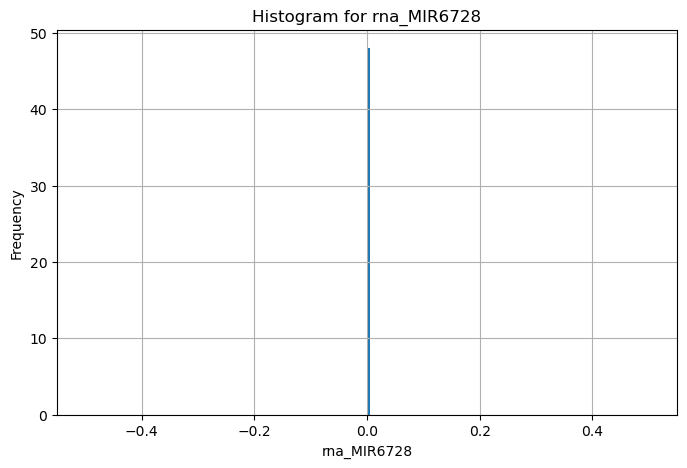

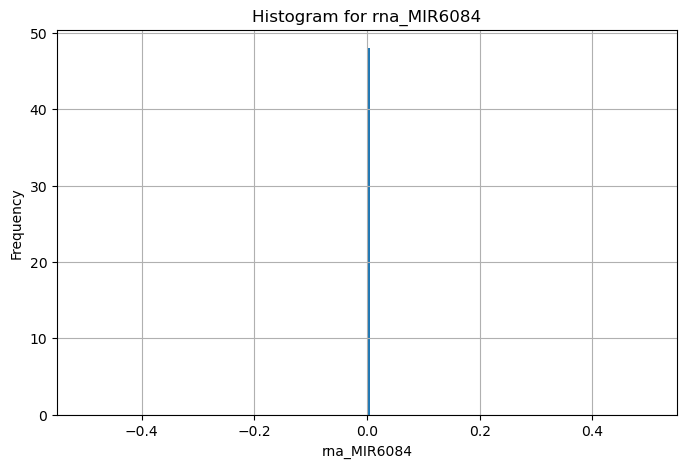

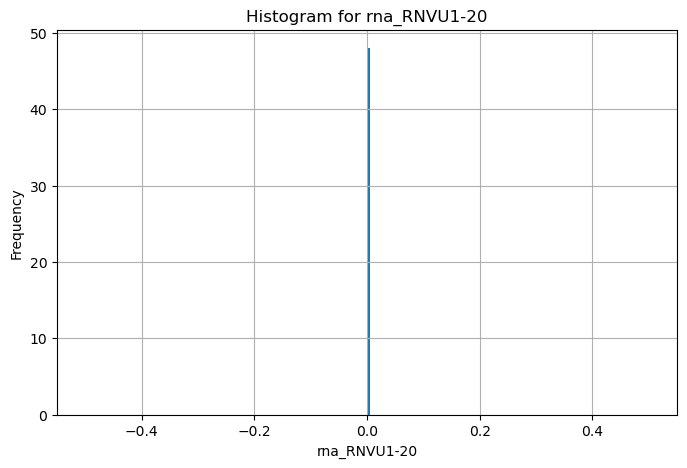

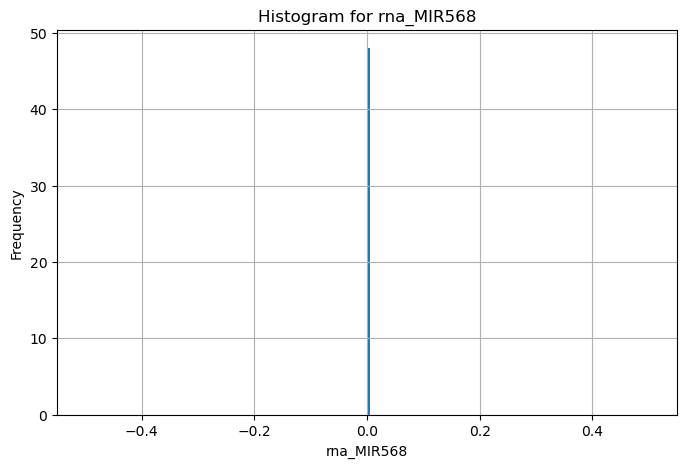

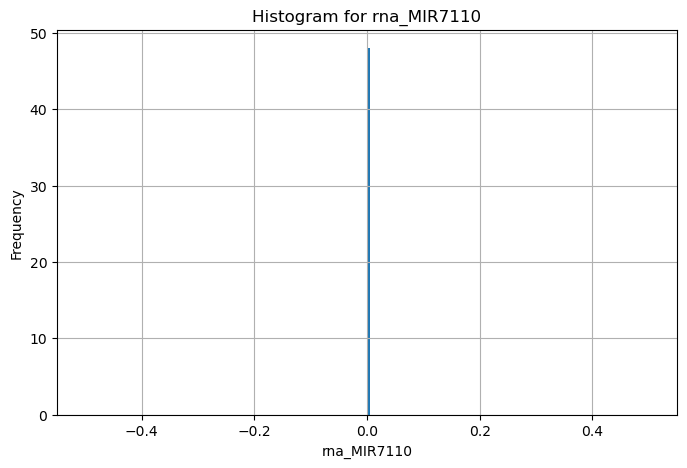

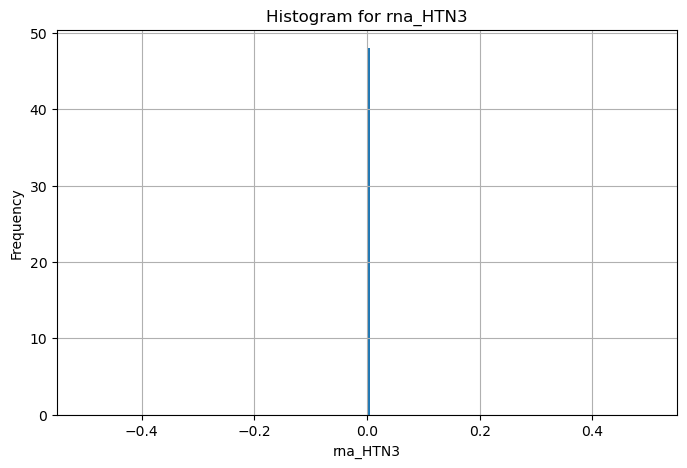

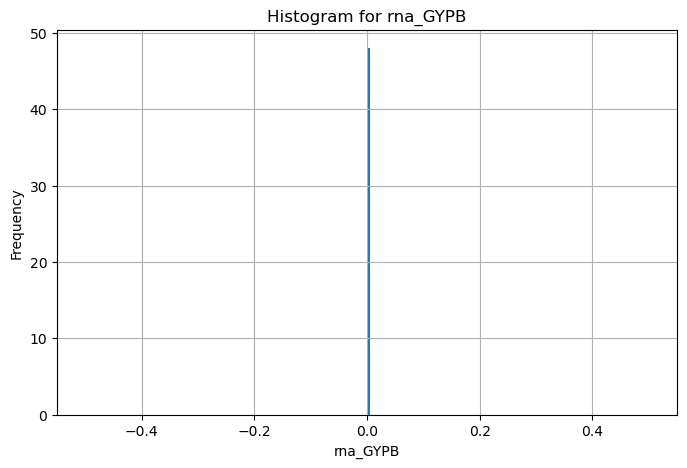

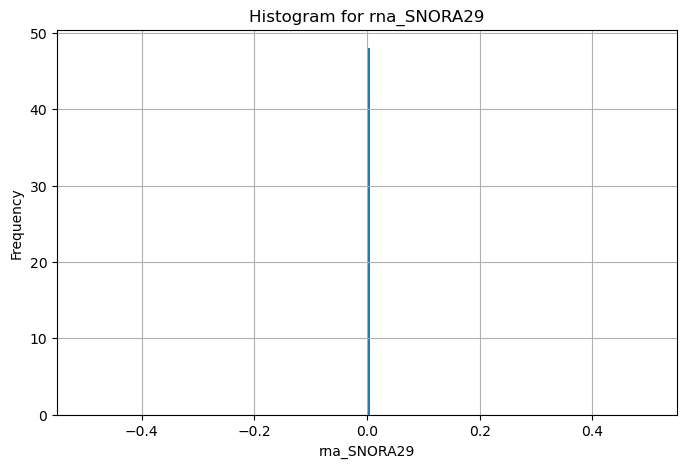

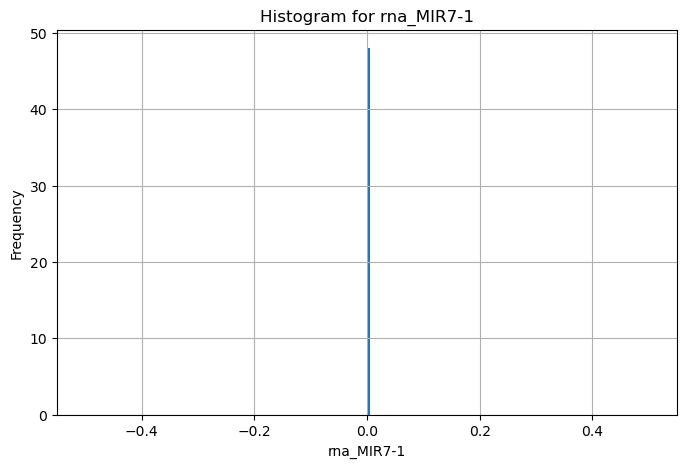

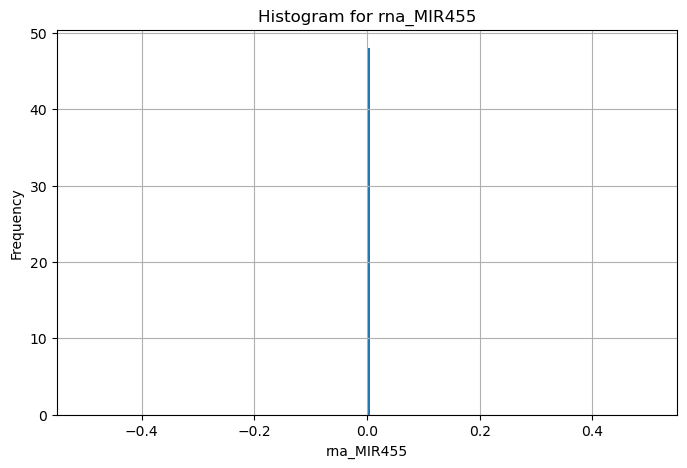

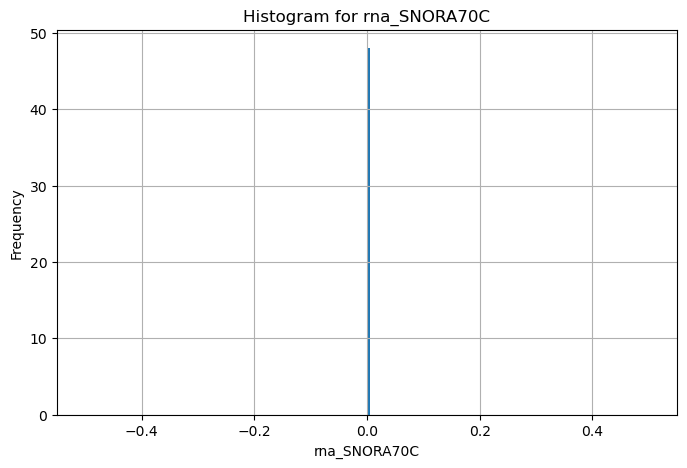

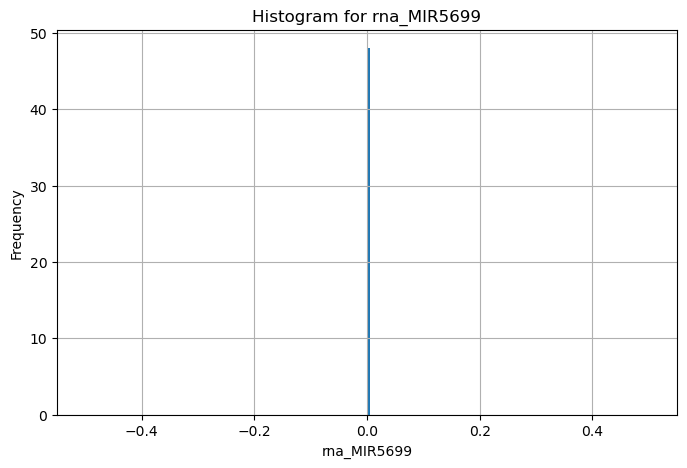

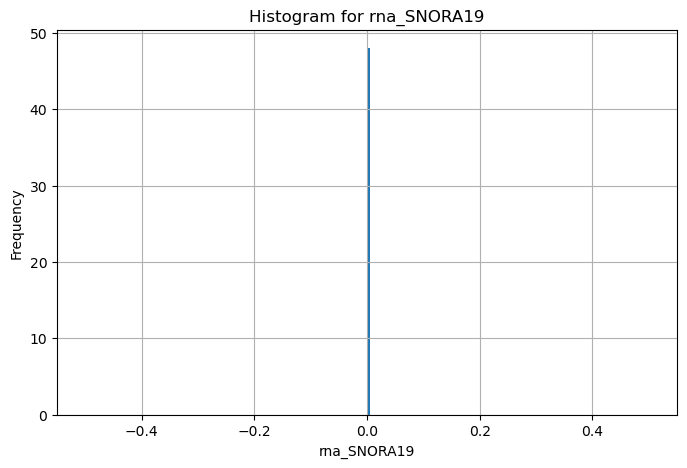

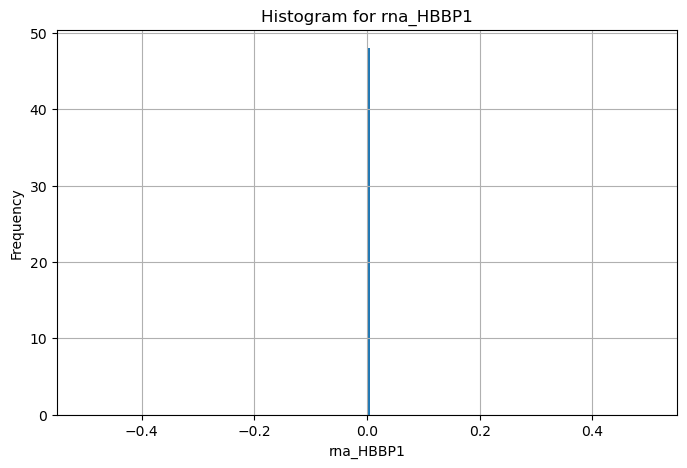

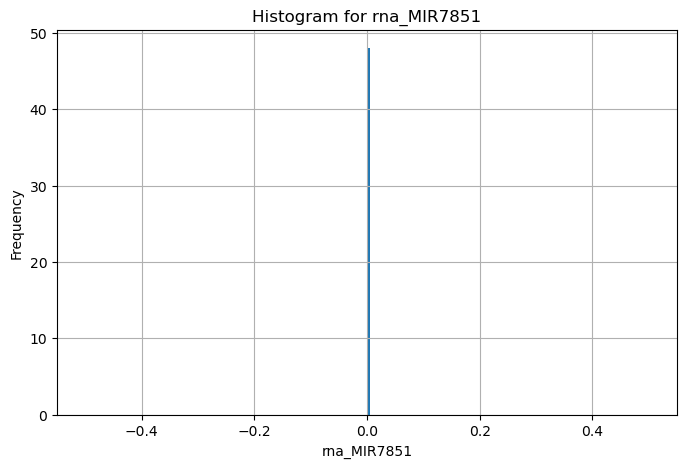

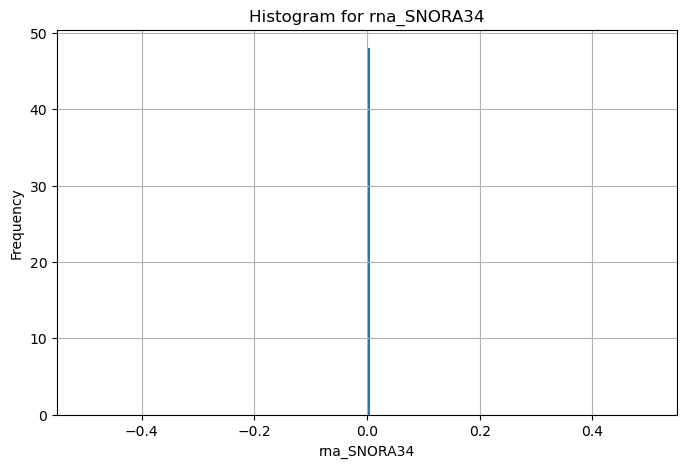

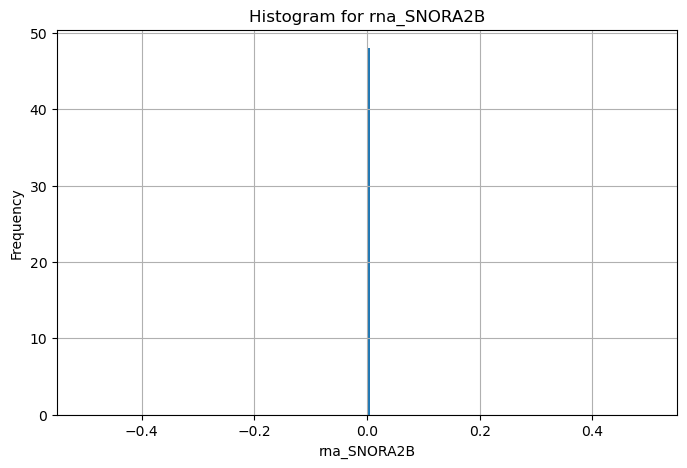

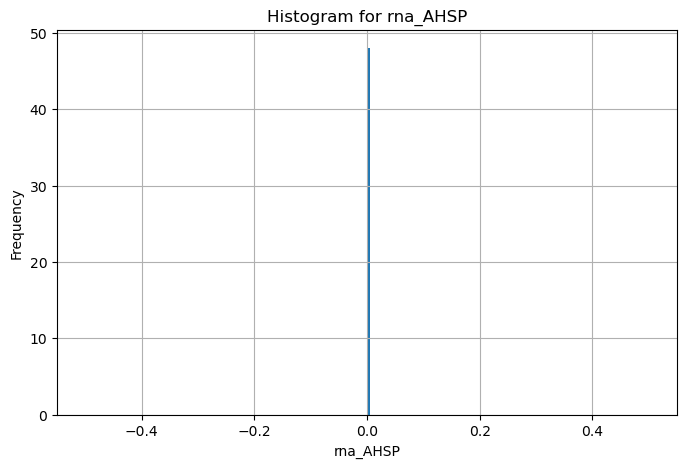

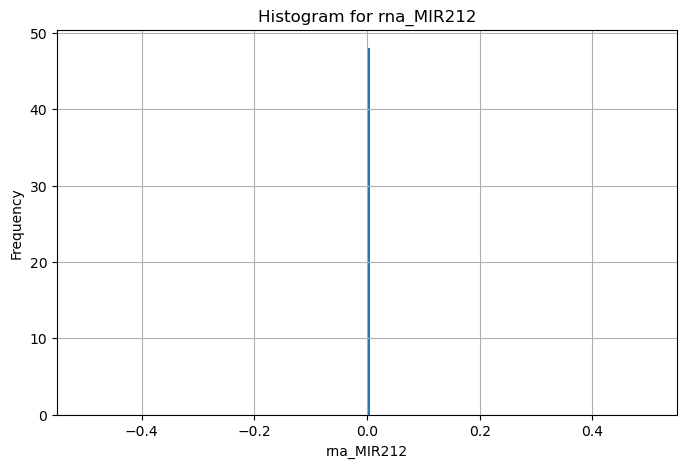

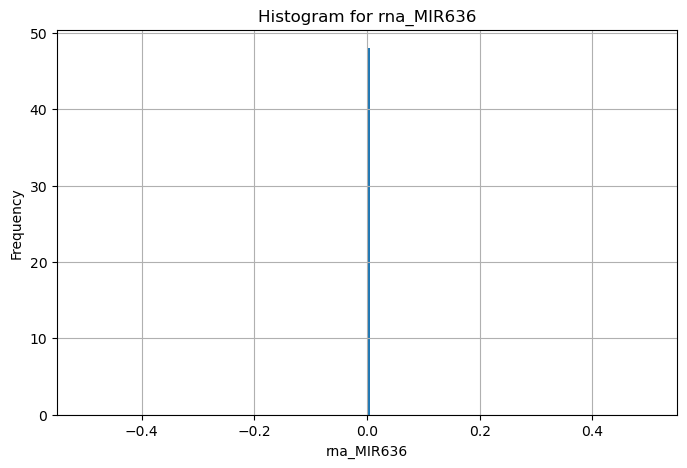

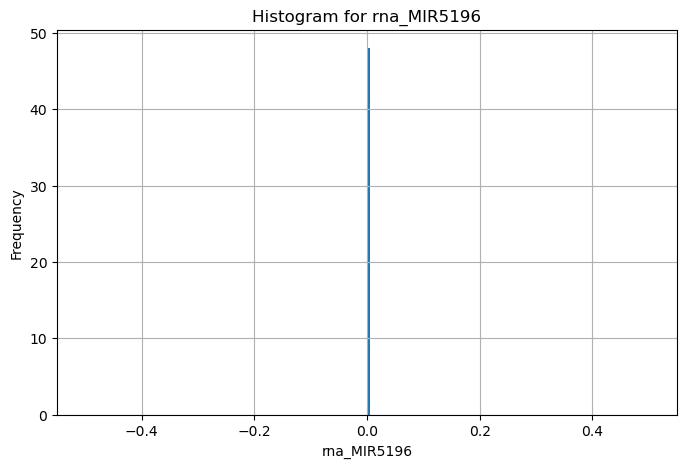

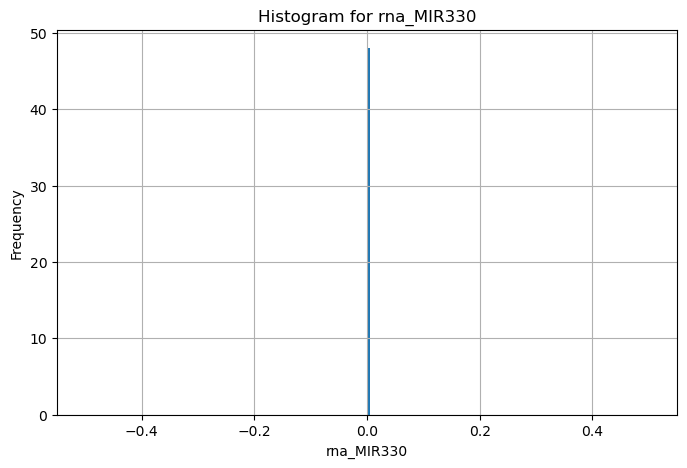

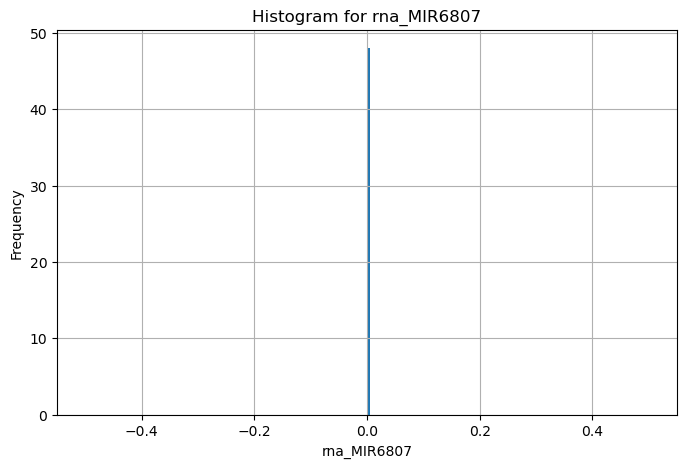

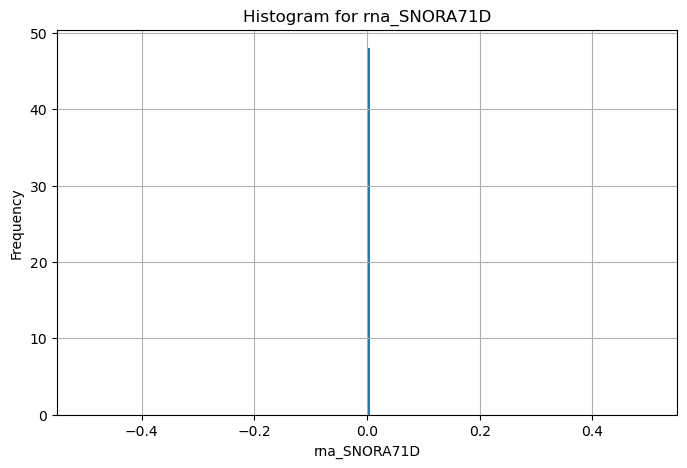

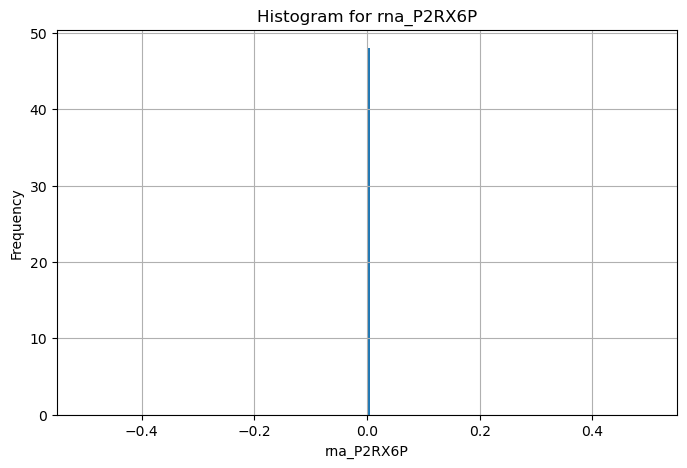

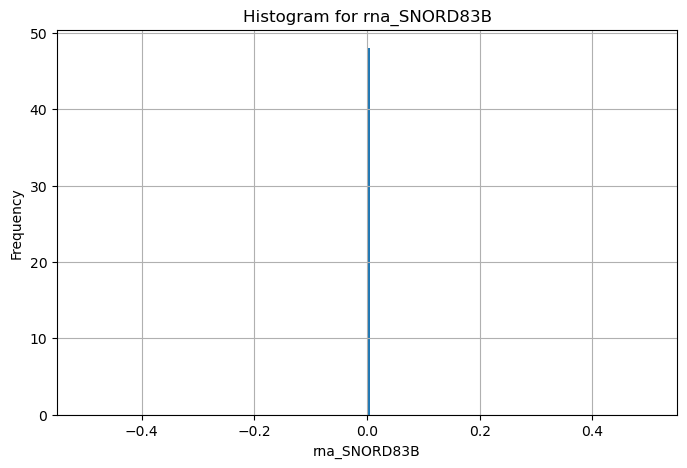

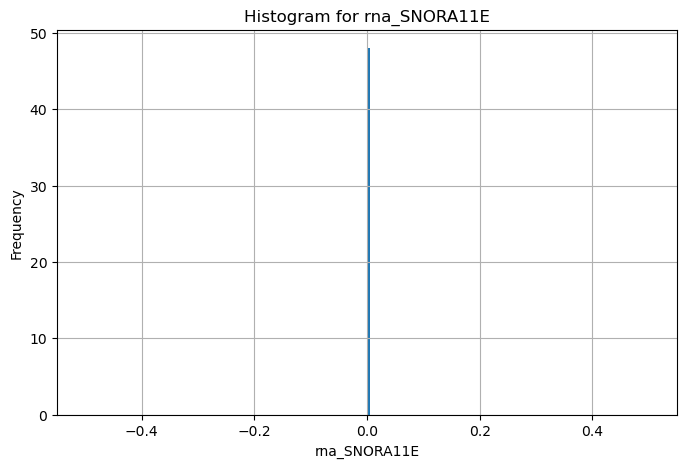

In [25]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and rna_excluded_columns is the variable containing excluded column names
for col in rna_excluded_columns:
    plt.figure(figsize=(8, 5))
    df[col].hist(bins=200)  # You can adjust the number of bins as needed
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [26]:
df[rna_columns].var().sort_values()

rna_MIR6728      0.000000
rna_MIR455       0.000000
rna_SNORA70C     0.000000
rna_SNORA29      0.000000
rna_HBBP1        0.000000
                  ...    
rna_UCHL1       11.648886
rna_KRT8        12.377303
rna_MIR663A     12.847071
rna_SNORD104    28.959167
rna_MIR5047     36.276563
Length: 15774, dtype: float64

In [27]:
df[rna_excluded_columns].var().sort_values()

rna_MIR6728     0.0
rna_MIR6084     0.0
rna_RNVU1-20    0.0
rna_MIR568      0.0
rna_MIR7110     0.0
rna_HTN3        0.0
rna_GYPB        0.0
rna_SNORA29     0.0
rna_MIR7-1      0.0
rna_MIR455      0.0
rna_SNORA70C    0.0
rna_MIR5699     0.0
rna_SNORA19     0.0
rna_HBBP1       0.0
rna_MIR7851     0.0
rna_SNORA34     0.0
rna_SNORA2B     0.0
rna_AHSP        0.0
rna_MIR212      0.0
rna_MIR636      0.0
rna_MIR5196     0.0
rna_MIR330      0.0
rna_MIR6807     0.0
rna_SNORA71D    0.0
rna_P2RX6P      0.0
rna_SNORD83B    0.0
rna_SNORA11E    0.0
dtype: float64

In [28]:
df[list(set(rna_columns)-set(rna_excluded_columns))].var().sort_values()

rna_RHOXF2B      0.000196
rna_XAGE3        0.000196
rna_RHAG         0.000293
rna_GYPA         0.000312
rna_BMX          0.000949
                  ...    
rna_UCHL1       11.648886
rna_KRT8        12.377303
rna_MIR663A     12.847071
rna_SNORD104    28.959167
rna_MIR5047     36.276563
Length: 15747, dtype: float64

In [29]:
rna_var_columns = list(set(rna_columns)-set(rna_excluded_columns))
len(rna_var_columns)

15747

In [30]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
y = df['Fulvestrant_response'] 

selector = SelectKBest(score_func=f_classif, k='all')

selector.fit(df[rna_var_columns], y)
                
selected_indices = selector.get_support(indices=True)

f_values = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to display the results
anova_test_result_df = pd.DataFrame({
    'Feature': rna_var_columns,
    'F-Value': f_values,
    'P-Value': p_values
})

anova_test_result_df[anova_test_result_df["P-Value"]<0.05].sort_values(by="F-Value",ascending=False)

,Feature,F-Value,P-Value
2018,rna_LINC00173,30.596098,0.000001
7352,rna_CLK2P1,25.027320,0.000009
15590,rna_KCNQ4,24.931682,0.000009
1038,rna_FRAT2,23.106590,0.000017
13131,rna_RPL13AP5,21.671792,0.000028
...,...,...,...
10266,rna_ZNF561-AS1,4.054261,0.049932
10524,rna_FIGN,4.053459,0.049954
7765,rna_PPP1R3C,4.053288,0.049958
13796,rna_CTXN1,4.052422,0.049982


In [31]:
rna_final_columns = list(set(anova_test_result_df[anova_test_result_df["P-Value"]<=0.05]["Feature"]))
len(rna_final_columns)

1594

In [32]:
len(rna_final_columns)

1594

In [33]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
y = df['Fulvestrant_response'] 

selector = SelectKBest(score_func=chi2, k='all')

selector.fit(df[mut_columns], y)
                
selected_indices = selector.get_support(indices=True)

f_values = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to display the results
chi_test_result_df = pd.DataFrame({
    'Feature': mut_columns,
    'F-Value': f_values,
    'P-Value': p_values
})

chi_test_result_df.sort_values(by="F-Value",ascending=False)

,Feature,F-Value,P-Value
4,mut_HSPG2,8.257143,0.004059
2,mut_H6PD,6.760000,0.009322
94,mut_CUL9,6.760000,0.009322
156,mut_LRRIQ1,5.000000,0.025347
45,mut_MAP2,4.800000,0.028460
...,...,...,...
133,mut_KAT6B,0.000000,1.000000
104,mut_ZNF804B,0.000000,1.000000
83,mut_DMGDH,0.000000,1.000000
23,mut_CACNA1S,0.000000,1.000000


In [39]:
chi_test_result_df[chi_test_result_df["P-Value"]<=0.05].sort_values(by="F-Value",ascending=False)

,Feature,F-Value,P-Value
4,mut_HSPG2,8.257143,0.004059
2,mut_H6PD,6.760000,0.009322
94,mut_CUL9,6.760000,0.009322
156,mut_LRRIQ1,5.000000,0.025347
45,mut_MAP2,4.800000,0.028460
158,mut_CIT,4.800000,0.028460


In [40]:
mut_final_columns = list(set(chi_test_result_df[chi_test_result_df["P-Value"]<=0.05]["Feature"]))
len(mut_final_columns)

6

In [41]:
from sklearn.feature_selection import mutual_info_classif

y = df['Fulvestrant_response'] 

selector = SelectKBest(score_func=mutual_info_classif, k='all')

selector.fit(df[mut_columns], y)

selected_indices = selector.get_support(indices=True)

mutual_info_values = selector.scores_

# Create a DataFrame to display the results
mutual_info_result_df = pd.DataFrame({
    'Feature': mut_columns,
    'Mutual Info': mutual_info_values
})

mutual_info_result_df.sort_values(by="Mutual Info", ascending=False)

,Feature,Mutual Info
112,mut_CNTNAP2,0.153832
161,mut_SACS,0.147726
210,mut_KIAA2022,0.141360
25,mut_ITPKB,0.138211
24,mut_USH2A,0.137134
...,...,...
19,mut_SPTA1,0.000000
21,mut_ASPM,0.000000
22,mut_CRB1,0.000000
23,mut_CACNA1S,0.000000


In [42]:
mutual_info_result_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mutual Info,214.0,0.019952,0.033667,0.0,0.0,0.0,0.029846,0.153832


<Axes: >

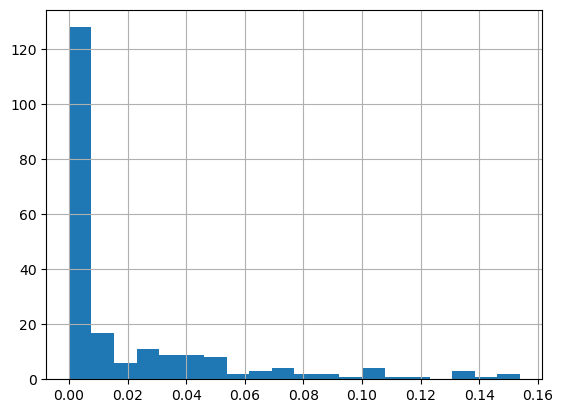

In [43]:
mutual_info_result_df["Mutual Info"].hist(bins=20)

In [44]:
skewness_scores = df[rna_final_columns].skew()
kurtosis_scores = df[rna_final_columns].kurtosis()

# Create a DataFrame to display the results
stats_df = pd.DataFrame({
    'Feature': rna_final_columns,
    'Skewness': skewness_scores,
    'Kurtosis': kurtosis_scores
})

stats_df

,Feature,Skewness,Kurtosis
rna_ARSE,rna_ARSE,1.097385,0.689978
rna_LINC00963,rna_LINC00963,0.316908,-0.117315
rna_MED26,rna_MED26,0.468471,-0.282275
rna_KCNMB3,rna_KCNMB3,0.790650,0.097313
rna_ZFAND1,rna_ZFAND1,0.916302,1.234679
...,...,...,...
rna_NSUN5,rna_NSUN5,-0.113991,0.096930
rna_ZBTB42,rna_ZBTB42,1.765721,3.293893
rna_ECE2,rna_ECE2,-0.194305,-0.033875
rna_SLC37A4,rna_SLC37A4,0.160656,-0.447958


In [45]:
final_columns = ['Fulvestrant_response', 'type']
final_columns.extend(mut_final_columns)
final_columns.extend(rna_final_columns)
final_columns = list(set(final_columns))
print(len(final_columns))

1602


In [46]:
pd.DataFrame(final_columns,columns=["features"]).sort_values(by="features")

,features
195,Fulvestrant_response
335,mut_CIT
287,mut_CUL9
1350,mut_H6PD
1296,mut_HSPG2
...,...
1026,rna_ZSCAN16
796,rna_ZSCAN32
900,rna_ZSCAN9
1458,rna_ZYX


In [51]:
pd.DataFrame(final_columns,columns=["features"]).to_csv("final_col_fulvestrant.csv")